<a href="https://colab.research.google.com/github/MahiKhan5360/neurodynamics-learning-log/blob/main/Passive_Membrane_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

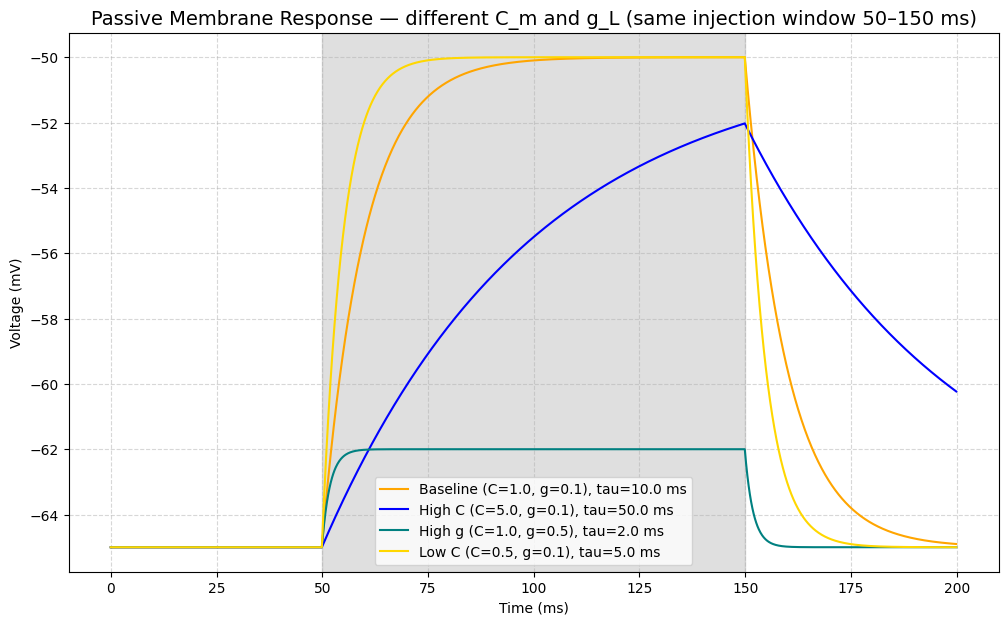

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------
# Simulation settings
# -----------------------------------------------------
T = 200          # ms
dt = 0.1
time = np.arange(0, T, dt)
n_steps = len(time)

# Input current (same for all simulations)
I = np.zeros(n_steps)
I[int(50/dt):int(150/dt)] = 1.5   # inject between 50–150 ms

# -----------------------------------------------------
# Define the parameter sets (C, g)
# -----------------------------------------------------
params = [
    (1.0, 0.1, "Baseline (C=1.0, g=0.1), tau=10.0 ms", "orange"),
    (5.0, 0.1, "High C (C=5.0, g=0.1), tau=50.0 ms", "blue"),
    (1.0, 0.5, "High g (C=1.0, g=0.5), tau=2.0 ms", "teal"),
    (0.5, 0.1, "Low C (C=0.5, g=0.1), tau=5.0 ms", "gold")
]

# Leak reversal potential
E_L = -65.0

# -----------------------------------------------------
# Plotting
# -----------------------------------------------------
plt.figure(figsize=(12,7))

for C_m, g_L, label, color in params:

    tau_m = C_m / g_L

    V = np.zeros(n_steps)
    V[0] = E_L

    for t in range(1, n_steps):
        dV = (-g_L * (V[t-1] - E_L) + I[t]) / C_m
        V[t] = V[t-1] + dt * dV

    plt.plot(time, V, label=f"{label}", color=color)

# Shaded region for current injection
plt.axvspan(50, 150, color='gray', alpha=0.25)

plt.title("Passive Membrane Response — different C_m and g_L (same injection window 50–150 ms)", fontsize=14)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
